In [1]:
# Imports

import pandas as pd
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read training data
data = pd.read_csv("train.csv")
d = pd.read_csv("train.csv")

# Import test data
df = pd.read_csv("test.csv")

# Print length of training and test data
print(len(data))
print(len(df))

# Print first 5 entries of df
data.head()

891
418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
d['Age'].fillna(100, inplace=True)
d.Survived.mean()

0.3838383838383838

In [4]:
survi = data[data["Survived"] == 1]
not_survi = data[data["Survived"] == 0]

Text(0.5, 1.0, 'Age Distribution')

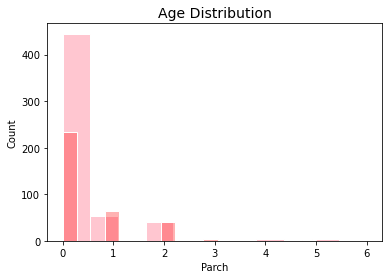

In [5]:
sns.histplot(data=not_survi, x="Parch", color='pink', alpha=0.9, edgecolor="white", label="New_Formula").set_title('Age Distribution', fontsize=14)
sns.histplot(data=survi, x="Parch", color='red', alpha=0.3, edgecolor="white", label="Newormula", legend='brief').set_title('Age Distribution', fontsize=14)

In [6]:
survi.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
len(data[data["Sex"] == "male"]) / ((len(data[data["Sex"] == "female"]) + len(data[data["Sex"] == "male"])))

0.6475869809203143

Text(0.5, 1.0, 'Gender, no age')

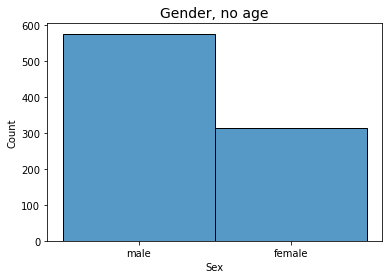

In [8]:
sns.histplot(data=data, x="Sex").set_title('Gender, no age', fontsize=14)

Text(0.5, 1.0, 'Gender, no age')

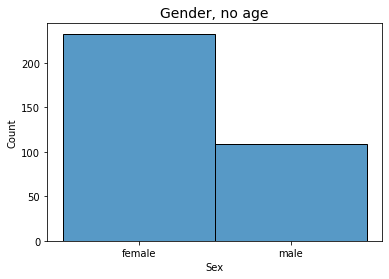

In [9]:
sns.histplot(data=survi, x="Sex").set_title('Gender, no age', fontsize=14)

In [10]:
len(survi[survi["Sex"] == "female"]) / ((len(survi[survi["Sex"] == "female"]) + len(survi[survi["Sex"] == "male"])))

0.6812865497076024

In [11]:
not_survi.Age.median()

28.0

Text(0.5, 1.0, 'Age Distribution')

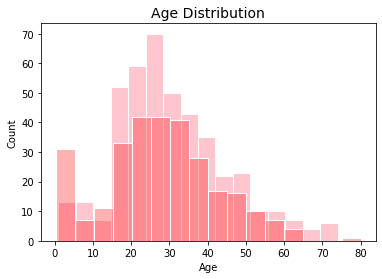

In [12]:
sns.histplot(data=not_survi, x="Age", color='pink', alpha=0.9, edgecolor="white", label="New_Formula").set_title('Age Distribution', fontsize=14)
sns.histplot(data=survi, x="Age", color='red', alpha=0.3, edgecolor="white", label="Newormula", legend='brief').set_title('Age Distribution', fontsize=14)

Text(0.5, 1.0, 'Age Distribution')

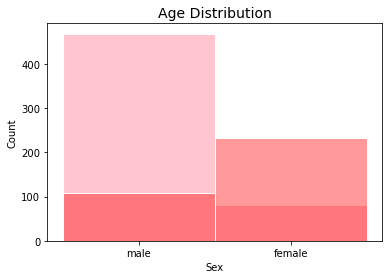

In [13]:
sns.histplot(data=not_survi, x="Sex", color='pink', alpha=0.9, edgecolor="white", label="New_Formula").set_title('Age Distribution', fontsize=14)
sns.histplot(data=survi, x="Sex", color='red', alpha=0.4, edgecolor="white", label="Newormula").set_title('Age Distribution', fontsize=14)

In [14]:
b = d[d["Age"] == int(100)]
b.Survived.mean()

0.2937853107344633

Text(0.5, 1.0, 'Gender, no age')

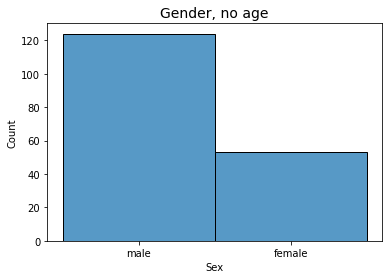

In [15]:
sns.histplot(data=b, x="Sex").set_title('Gender, no age', fontsize=14)

In [16]:
a = d[d["Age"] != int(100)]
a.Survived.mean()

0.4061624649859944

In [17]:
b.Survived.mean()

0.2937853107344633

Text(0.5, 1.0, 'Survived')

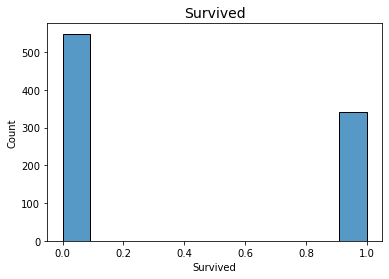

In [18]:
# Distribution of survived

import seaborn as sns
# plt.hist([data["Survived"], data["Sex"]], color=['r','b'], alpha=0.5)

# sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data, x="Survived").set_title('Survived', fontsize=14)

Text(0.5, 1.0, 'Age Distribution')

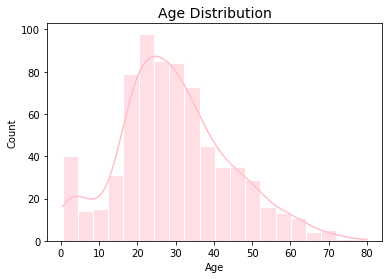

In [19]:
# Distribution of age without missing values

sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data, x="Age", kde=True, color='pink', edgecolor="white").set_title('Age Distribution', fontsize=14)

In [20]:
# Description of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Percentage of people that survived in dataset

data.Survived.sum()/len(data)

0.3838383838383838

In [22]:
# 681 unique ticket values, therefore delete

data.Ticket.nunique()

681

In [23]:
print("Missing values per Column:\n")
names["Training data:", "Test data (prediction):"]

for i, d in enumerate([data, df]):
    print(names[i])
    for col in d.columns:
        print(f'{col}: {d[col].isnull().sum()}')

Missing values per Column:



NameError: name 'names' is not defined

In [ ]:
# Fare is missing 1 entry, lets replace this with mean

df['Fare'].fillna(df["Fare"].mean(), inplace=True)

In [ ]:
data["Embarked"].value_counts()

In [ ]:
# construct a variable no_age, as 70 percent of no age does not survive

import math

for d in [data, df]:
    l = []
    for i in d.Age.values:
        if i > 0 and i < 99:
            l.append(0)
        else:
            l.append(1)
    d["no_age"] = l

In [ ]:
## Feature engineering
# PassengerID is redundant
# Name is hard to be a predictor
# Ticket has 681/891 so probably not a predictor
# Cabin a lot of missing values

# Save PassengerID
pID = df["PassengerId"]
print(len(pID))
delete = ["PassengerId", "Name", "Cabin", "Ticket", "Embarked"]

for col in delete:
    del data[col]
    del df[col]

In [ ]:
# Replace male/female by 0 or 1 in order to be readable by ML model
# Age has a lot of missing values, replace age by median
# Embarked has 2 missing values, replace by S as it occurs most often

print(df['Age'].mean())
print(data['Age'].mean())
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)
df['Sex'].replace('female', 0, inplace=True)
df['Sex'].replace('male', 1, inplace=True)
df['Age'].fillna(28, inplace=True)
data['Age'].fillna(28, inplace=True)
# data['Embarked'].fillna('S', inplace=True)
# df['Embarked'].fillna('S', inplace=True)
data.head()

In [ ]:
for i in ['Fare']:
    sns.histplot(data=data, x=i, kde=True)

In [ ]:
for i in ['Age']:
    sns.histplot(data=data, x=i, kde=True)

In [ ]:
# Divide age group in 3
# Child, Adolescent, Old

dfs = [data, df]

for d in dfs:
    
    child = []
    yup = []
    old = []
    cheap = []
    expensive = []
    indices = []
    hclass = []
    lclass = []
    
    for j,i in enumerate(d.Pclass):
        if i < 3:
            hclass.append(0)
            lclass.append(1)
        else:
            hclass.append(1)
            lclass.append(0)

    
    for j,i in enumerate(d.Age):
        if i < 17:
            child.append(1)
            yup.append(0)
            old.append(0)
            indices.append(j)
        elif i < 35:
            child.append(0)
            yup.append(1)
            old.append(0)
        else:
            child.append(0)
            yup.append(0)
            old.append(1)

    for i in d.Fare:
        if i < 10:
            cheap.append(1)
            expensive.append(0)
        else:
            cheap.append(0)
            expensive.append(1)
        
    d["Child"] = child
#     d["Young"] = yup
#     d["Old"] = old
#     d["Cheap"] = cheap
#     d["Expensive"] = expensive
    d["High_class"] = hclass
#     d["Low_class"] = lclass


    del d["Age"]
    del d["Fare"]
    del d["Pclass"]

In [ ]:
# Make dummy/artificial variables

for d in dfs:

    males = []
    females = []
    family = []
    nofam = []

    for j,i in zip(d.SibSp, d.Parch):
        if i > 0 or j > 0:
            family.append(j + i)
        else:
            family.append(0)

    for j,i in enumerate(d.Sex):
        if j in indices:
            males.append(0)
            females.append(0)
        elif i == 1:
            males.append(1)
            females.append(0)
        else:
            males.append(0)
            females.append(1)

#     d["Male"] = males
    d["Female"] = females
    d["Family"] = family
#     d["No_family"] = nofam

    del d["Sex"]
    del d["SibSp"]
    del d["Parch"]

In [ ]:
# Correlation matrix of data
data.corr()

In [ ]:
# Convert dataframe to numpy arrays for ML
# Target variable

y = data.Survived.to_numpy()
data = data.drop('Survived', axis = 1)

In [ ]:
# Convert pandas to numpy array
X = data.to_numpy()
X2 = df.to_numpy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Apply Machine learning (K-fold Crossvalidation)
rmin = []
rmax = []
rmean = []
stdev= []
allscores=[]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for i, clf in enumerate(classifiers):
    scores = cross_val_score(clf, X, y, cv=10)
    allscores.append(scores)
    print(f"{names[i]}: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    rmin.append(scores.min())
    rmax.append(scores.max())
    rmean.append(scores.mean())
    stdev.append(scores.std())

result = pd.DataFrame(index=names)
result["min"] = rmin
result["max"] = rmax
result["mean"] = rmean
result["stdev"] = stdev

In [ ]:
from scipy import stats

print(stats.ttest_ind(allscores[0], allscores[-1]))
print(stats.ttest_ind(allscores[0], allscores[-2]))
print(stats.ttest_ind(allscores[0], allscores[-3]))

In [ ]:
print(result.to_latex())

In [ ]:
# Convert pandas to numpy array
X2 = df.to_numpy()

In [ ]:
# predict using a RF classifier
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf.fit(X, y)
pred = rf.predict(X2)

In [ ]:
# Store results in a csv
result = pd.DataFrame(columns = ['PassengerId', 'Survived'])
result['PassengerId'] = pID
result['Survived'] = pred

In [ ]:
result.to_csv("output.csv", index=False)